In [85]:
from functools import reduce
import pandas as pd
import pylab as pl
import numpy as np
import math

# Lab 05
# Group: Declan Sheehan, Jack Stoetzel.

iris = pd.read_csv('./lab05data/iris.data',
                      header=None,
                      skipinitialspace=True,
                      names=['sepall', 'sepalw', 'petall', 'petalw', 'class']
)

**Mean With Confidence Interval:** $\overline{x} \pm Z\frac{s}{\sqrt{n}}$

- Where **Z** is the Z-value.
- **s** is the standard deviation.
- **n** is the number of observations.

Text(0.5,0.98,'The 95% Confidence Interval Mean for Sepal Length & Width, and Petal Length & Width')

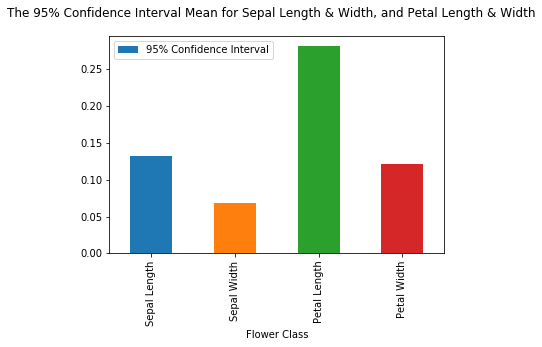

In [86]:
# QUESTION 4:
columns = iris.columns[0:4]

def ConfidenceInterval(Z, data):
    return (Z * (np.std(data) / math.sqrt(data.count())))

Q4_data = []

for col in columns:
    Q4_data.append(ConfidenceInterval(1.960, iris[col]))
    
Q4 = pd.DataFrame({'Flower Class': ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
                  '95% Confidence Interval': Q4_data})

Q4.plot.bar(x='Flower Class', y='95% Confidence Interval')
pl.suptitle('The 95% Confidence Interval Mean for Sepal Length & Width, and Petal Length & Width')

Text(0.5,0.98,'The 95% Confidence Interval Mean for Sepal Length & Width, and Petal Length & Width Divided by Flower Class')

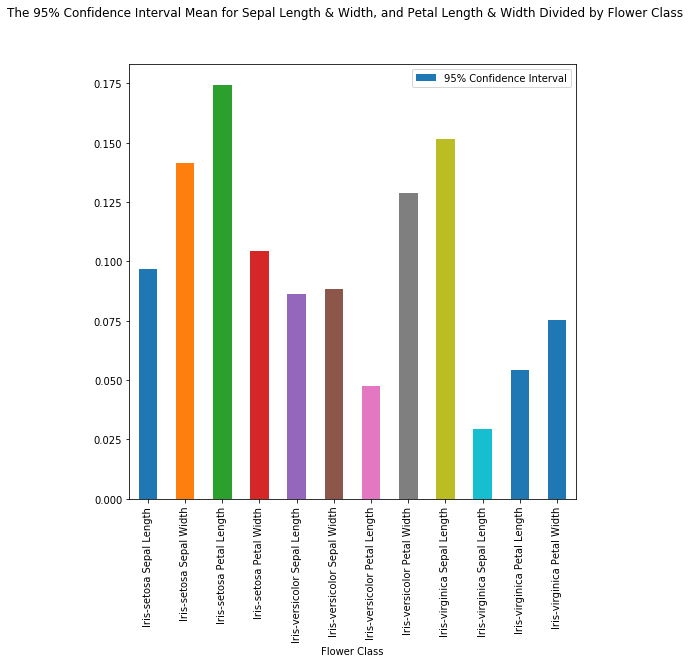

In [87]:
# QUESTION 5:
Q5_data = []
for col in columns:
    Q5_data.append(ConfidenceInterval(1.960, iris[col].head(50)))
    Q5_data.append(ConfidenceInterval(1.960, pd.concat([iris.head(100), iris.head(50)]).drop_duplicates(keep=False)[col]))
    Q5_data.append(ConfidenceInterval(1.960, iris[col].tail(50)))
    
Q5 = pd.DataFrame({'Flower Class': ['Iris-setosa Sepal Length', 'Iris-setosa Sepal Width', 'Iris-setosa Petal Length', 'Iris-setosa Petal Width',
                                        'Iris-versicolor Sepal Length','Iris-versicolor Sepal Width', 'Iris-versicolor Petal Length', 'Iris-versicolor Petal Width',
                                        'Iris-virginica Sepal Length', 'Iris-virginica Sepal Length', 'Iris-virginica Petal Length', 'Iris-virginica Petal Width'],
                      '95% Confidence Interval': Q5_data})

Q5.plot.bar(x='Flower Class', y='95% Confidence Interval', rot=90, ax=pl.figure(figsize=(8, 8)).gca())
pl.suptitle('The 95% Confidence Interval Mean for Sepal Length & Width, and Petal Length & Width Divided by Flower Class')

## Question 6:
### Looking at the data, I claim that the mean for Iris-setosa Petal length mean is greater than Iris-versicolor Petal Length mean.
- Our sample size is: **50.** $( = n_1 = n_2)$
- The mean for Iris-setosa Petal Length is: **0.17448536039450416.** $(\overline{x}_1)$
- The mean for Iris-versicolor Petal Length is: **0.0476114621493606.** $(\overline{x}_2)$
- The standard deviation for petal lengths is: **1.785.** $(= s_1 = s_2)$

We can calculate the combined **standard deviation** by using:
$ s = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2)}{n_1 + n_2 - 2}} $

where $n_1$ is the first mean, and $n_2$ is the second mean, and $s_1 , s_2$ is the standard deviation for the petal lengths.

Then, we calculate the **standard error** by using:
$ se = s*\sqrt{1/n_1 + 1/n_2} $

Lastly, we calulcate the **t-statistic** by using:
$ t = \frac{\overline{x_1} - \overline{x_2}}{se} $

(Using two-tailed & degress of freedom = 98) the p-value is: **0.717387.**

With a p-value like that, the strength of this conclusion is **not strong** as it is not statistically significant (p < 0.05). This means that we cannot reject my hypothesis: $ H_0 = \overline{x}_1 > \overline{x}_2 $ (We fail to reject it).

Judging from the below histogram of the iris data, the petal width looks the most like a normal distribution. The others do not really look like a normal distribution. Depending on the p-value and the distribution of the data, it will tell us whether the data gathered from this accurately represents the set of data. Since the p-value represents the probability (area under the curve) of the result, we can say that the normal distribution is more accurately represented for the petal width, BUT if the data is not normal, this may throw the p-value off depending on the data being observed. That is why more information other than the p-value is important.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01579936d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f015730a1d0>]], dtype=object)

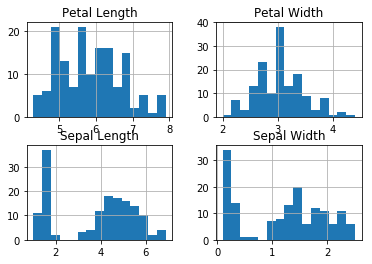

In [90]:
histo = iris
histo.columns = ['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width', 'Flower Class']
histo.hist(bins=15)